In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors # For Hyperparameter Tuning
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from random import sample
from numpy.random import uniform

In [2]:
def Elbow_vis(ndf):
    k_max =15
    model = KMeans()
    vis = KElbowVisualizer(model, k=(2,k_max), metric='distortion', timings=False)
    vis.fit(ndf)  
    vis.show()

In [3]:
def Silhoulette_vis(ndf):
    k_max =15
    model = KMeans()
    vis = KElbowVisualizer(model, k=(2,k_max), metric='silhouette', timings=False)
    vis.fit(ndf)  
    vis.show()

In [4]:
def Elbow_Method(ndf):
    distortions = []
    max_k = 15
    for k in range(2, max_k):
        kmeans_iter = KMeans(n_clusters=k, n_init=10, max_iter=100)
        kmeans_iter.fit(ndf)
    
        distortions.append(kmeans_iter.inertia_)
        
    return distortions

In [5]:
def K_Silhoulette(ndf):
    sil_list = list()
    max_k = 15
    for k in range(2, max_k):
        kmeans_iter = KMeans(n_clusters=k, n_init=10, max_iter=100)
        kmeans_iter.fit(ndf)
    
        sil_list.append(silhouette_score(ndf, kmeans_iter.labels_))
        
    return sil_list

In [6]:
def plot_silhoulette(sil_list):
    # plot indicators
    plt.figure(figsize=(12, 8))
    plt.plot(range(2, len(sil_list) + 2), sil_list)
    plt.xlabel('K', fontsize=20)
    plt.ylabel('Silhouette', fontsize=18)
    plt.legend()
    plt.show()

In [7]:
def K_Means(k,ndf,sil_list):
    labels = []
    centers=[]
    norm_centers=[]
    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(ndf)
    norm_centers.append(kmeans.cluster_centers_)
    centers.append(minmax_scaler.inverse_transform(kmeans.cluster_centers_)) # we store the coordinates of the centroids
    labels.append(kmeans.labels_) # we store the labels associated with the records
    print("SILHOUETTE:",sil_list[k-2])
    
    cluster_col = 'K_' + str(k) # it contains the name of the column containing the optimal labels
    #l = np.transpose(labels)
    #df[cluster_col] = l
    [centers]=centers
    
    return labels,centers,norm_centers,cluster_col

In [8]:
def ConvertClusterList(df,k_str):
    clust_list = list()
    for i in range(len(df[k_str].unique())):
        clust_list.append(df[df[k_str] == i])
        
    return clust_list

In [9]:
def single_silhouette_score_6(ndf,labels_k,idx):
    if idx>0:
        [labels_k[idx]]=labels_k[idx]
        sample_silhouette_values = silhouette_samples(ndf, labels_k[idx])
    else:
        sample_silhouette_values = silhouette_samples(ndf, labels_k)
    sample_values_k0=[]
    sample_values_k1=[]
    sample_values_k2=[]
    sample_values_k3=[]
    sample_values_k4=[]
    sample_values_k5=[]
    if idx>0:
        for i in range(0,len(sample_silhouette_values)):
            if labels_k[idx][i]==0:
                sample_values_k0.append(sample_silhouette_values[i])
            elif labels_k[idx][i]==1:
                sample_values_k1.append(sample_silhouette_values[i])
            elif labels_k[idx][i]==2:
                sample_values_k2.append(sample_silhouette_values[i])
            elif labels_k[idx][i]==3:
                sample_values_k3.append(sample_silhouette_values[i])
            elif labels_k[idx][i]==4:
                sample_values_k4.append(sample_silhouette_values[i])
            else:
                sample_values_k5.append(sample_silhouette_values[i])
    else:
        for i in range(0,len(sample_silhouette_values)):
            if labels_k[i]==0:
                sample_values_k0.append(sample_silhouette_values[i])
            elif labels_k[i]==1:
                sample_values_k1.append(sample_silhouette_values[i])
            elif labels_k[i]==2:
                sample_values_k2.append(sample_silhouette_values[i])
            elif labels_k[i]==3:
                sample_values_k3.append(sample_silhouette_values[i])
            elif labels_k[i]==4:
                sample_values_k4.append(sample_silhouette_values[i])
            else:
                sample_values_k5.append(sample_silhouette_values[i])
            
    print(np.mean(sample_values_k0))
    print(np.mean(sample_values_k1))
    print(np.mean(sample_values_k2))
    print(np.mean(sample_values_k3))
    print(np.mean(sample_values_k4))
    print(np.mean(sample_values_k5))

In [10]:
def single_silhouette_score(ndf,labels_k,idx):
    [labels_k[idx]]=labels_k[idx]
    sample_silhouette_values = silhouette_samples(ndf, labels_k[idx])
    sample_values_k0=[]
    sample_values_k1=[]
    sample_values_k2=[]
    sample_values_k3=[]
    for i in range(0,len(sample_silhouette_values)):
        if labels_k[idx][i]==0:
            sample_values_k0.append(sample_silhouette_values[i])
        elif labels_k[idx][i]==1:
            sample_values_k1.append(sample_silhouette_values[i])
        elif labels_k[idx][i]==2:
            sample_values_k2.append(sample_silhouette_values[i])
        else:
            sample_values_k3.append(sample_silhouette_values[i])
            
    print(np.mean(sample_values_k0))
    print(np.mean(sample_values_k1))
    print(np.mean(sample_values_k2))
    print(np.mean(sample_values_k3))

In [11]:
def plot_silhoulette_clusters(ndf,labels,k):
    plt.figure(figsize = (12,6))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    plt.xlim([-0.1, 1])
    # The (k+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(ndf) + (k + 1) * 10])
    
    silhouette_avg = silhouette_score(ndf, labels)
    sample_silhouette_values = silhouette_samples(ndf, labels)

    y_lower = 10
    bar_colors = []
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.cividis(float(i) / k)
        bar_colors.append(color)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters. Avg Sil = " + '{:.4f}'.format(silhouette_avg))
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

In [12]:
def plot_Histograms(df,clust_list):
    attr = df.columns
    num_elements = 4
    clusters = range(len(clust_list))
    fig, axs = plt.subplots(math.ceil(len(attr) / num_elements),num_elements,figsize=(15,8))
    for attr_index in range(len(attr)):
        mean_values = []
        for cluster_df in clust_list:
            mean_values.append(cluster_df.describe()[attr[attr_index]][1])
        axs[int(attr_index / num_elements)][attr_index % num_elements].bar(clusters, mean_values, color = ['b','y','g','r'])
        axs[int(attr_index / num_elements)][attr_index % num_elements].set_title(f"{attr[attr_index]} - Mean")

In [13]:
def plot_parallelCoordinates(centers,df):
    plt.figure(figsize=(28, 10))
    for i in range(0, len(centers)):
        plt.plot(centers[i], marker='o', label='Cluster %s' % i)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.xticks(range(0, len(df.columns)), df.columns, fontsize=15)
    plt.legend(fontsize=10)
    plt.show()

In [14]:
# function to compute hopkins's statistic for the dataframe X
def hopkins_statistic(X):    
    X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures
     
    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))
    
    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
   
    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)
    
    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    
    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]
      
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    
    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [15]:
df = pd.read_csv('../dataset/customer/new_Customer_2011.csv', sep=',', index_col=0)
df

,MeanProdSale,TotalSale,MeanSpentSession,MeanProdSession,TotalProdRet,MinProdSpent,MaxProdSpent,MeanTimeGap,Nsessions,DistinctProd
Customer ID,,,,,,,,,,
13313.0,2.132308,1555.32,311.064000,170.200000,0,5.04,59.40,57.500000,5.0,47
18097.0,3.084059,2510.33,418.388333,238.166667,1,5.04,108.48,40.000000,5.0,65
16656.0,2.254058,8139.48,406.974000,423.850000,21,10.08,504.00,16.578947,14.0,14
16875.0,3.585268,2024.31,224.923333,116.222222,23,6.96,39.80,36.375000,5.0,93
13094.0,1.260000,1485.18,99.012000,90.000000,174,53.10,152.64,22.571429,11.0,4
...,...,...,...,...,...,...,...,...,...,...
13436.0,5.830000,196.89,196.890000,76.000000,0,10.20,25.50,0.000000,1.0,12
15520.0,1.724444,343.50,343.500000,314.000000,0,9.48,34.68,0.000000,1.0,18
13298.0,3.750000,360.00,360.000000,96.000000,0,90.00,270.00,0.000000,1.0,2


<h3>Selection features</h3>

In [16]:
#selected_features = ['TotalProd','MeanProdSession', 'MeanSpentSession', 'MeanProdSale']
#selected_features = ['TotalProd', 'MeanTimeGap','TotalSale']
selected_features = ['Nsessions', 'MeanTimeGap','TotalSale']
#selected_features = ['Nsessions', 'MeanTimeGap','MeanSpentSession']
df_aux = df[selected_features]
df_aux.head()

,Nsessions,MeanTimeGap,TotalSale
Customer ID,,,
13313.0,5.0,57.500000,1555.32
18097.0,5.0,40.000000,2510.33
16656.0,14.0,16.578947,8139.48
16875.0,5.0,36.375000,2024.31
13094.0,11.0,22.571429,1485.18


<h3>Hopkins statistic</h3>

In [19]:
l = [] #list to hold values for each call
for i in range(20):
    H=hopkins_statistic(df_aux)
    l.append(H)
#print average value:
np.mean(l)

0.9946939528586805

<h3>Normalization</h3>

In [20]:
minmax_scaler = MinMaxScaler(feature_range = (0, 1)) # MinMaxScaler
df_norm_minmax = minmax_scaler.fit_transform(df_aux.to_numpy())
ndf = pd.DataFrame(df_norm_minmax, columns=df_aux.columns)

<h3>Elbow method</h3>

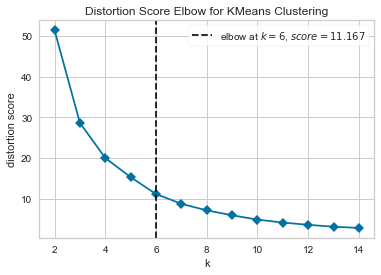

In [19]:
Elbow_vis(ndf)

<h3>Silhoulette method</h3>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


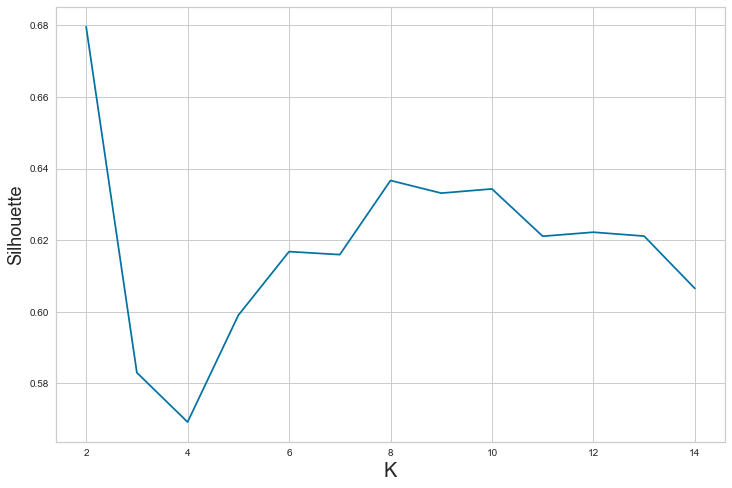

In [18]:
sil_list_11=K_Silhoulette(ndf)
plot_silhoulette(sil_list_11)

In [19]:
k_list=[2,3,4,5,6,8]
labels_k=[]
centers_k=[]
norm_centers_k=[]
cluster_col_k=[]

for i in k_list:
    labels,centers,norm_centers,cluster_col=K_Means(i,ndf,sil_list_11)
    labels_k.append(labels)
    norm_centers_k.append(norm_centers)
    centers_k.append(centers)
    cluster_col_k.append(cluster_col)
    
clust_list_11_k=[]
for i in range(0,len(k_list)):
    data=df.copy()
    l = np.transpose(labels_k[i])
    data[cluster_col_k[i]]=l
    clust_list_11=ConvertClusterList(data,cluster_col_k[i])
    clust_list_11_k.append(clust_list_11)
    del data

SILHOUETTE: 0.67963197413435
SILHOUETTE: 0.5830224831231888
SILHOUETTE: 0.5692310155335445
SILHOUETTE: 0.5990429588883109
SILHOUETTE: 0.6168262678536377
SILHOUETTE: 0.636679231034043


<h3>Internal analysis</h3>

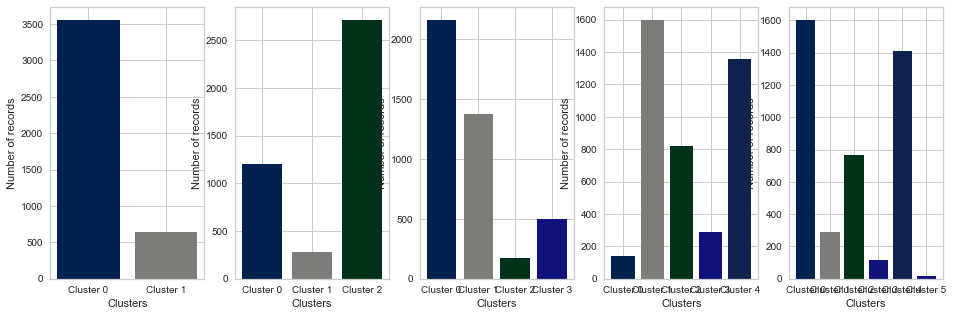

1602
291
767
117
1408
20


In [22]:
f, axs = plt.subplots(nrows=1, ncols=5, figsize=(16,5))

axs[0].bar(['Cluster 0','Cluster 1'], [len(clust_list_11_k[0][0]), len(clust_list_11_k[0][1])], color=['#00224e','#7d7c78'])
axs[0].set_xlabel('Clusters')
axs[0].set_ylabel('Number of records')

axs[1].bar(['Cluster 0','Cluster 1','Cluster 2'], [len(clust_list_11_k[1][0]),len(clust_list_11_k[1][1]),len(clust_list_11_k[1][2])], color=['#00224e','#7d7c78','#00321a'])
axs[1].set_xlabel('Clusters')
axs[1].set_ylabel('Number of records')

axs[2].bar(['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], [len(clust_list_11_k[2][0]),len(clust_list_11_k[2][1]),len(clust_list_11_k[2][2]),len(clust_list_11_k[2][3])], color=['#00224e','#7d7c78','#00321a','#11127c'])
axs[2].set_xlabel('Clusters')
axs[2].set_ylabel('Number of records')

axs[3].bar(['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4'], [len(clust_list_11_k[3][0]),len(clust_list_11_k[3][1]),len(clust_list_11_k[3][2]),len(clust_list_11_k[3][3]),len(clust_list_11_k[3][4])], color=['#00224e','#7d7c78','#00321a','#11127c','#11224e'])
axs[3].set_xlabel('Clusters')
axs[3].set_ylabel('Number of records')

axs[4].bar(['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5'], [len(clust_list_11_k[4][0]),len(clust_list_11_k[4][1]),len(clust_list_11_k[4][2]),len(clust_list_11_k[4][3]),len(clust_list_11_k[4][4]),len(clust_list_11_k[4][5])], color=['#00224e','#7d7c78','#00321a','#11127c','#11224e','#11127c'])
axs[4].set_xlabel('Clusters')
axs[4].set_ylabel('Number of records')

plt.show()

print(len(clust_list_11_k[4][0]))
print(len(clust_list_11_k[4][1]))
print(len(clust_list_11_k[4][2]))
print(len(clust_list_11_k[4][3]))
print(len(clust_list_11_k[4][4]))
print(len(clust_list_11_k[4][5]))

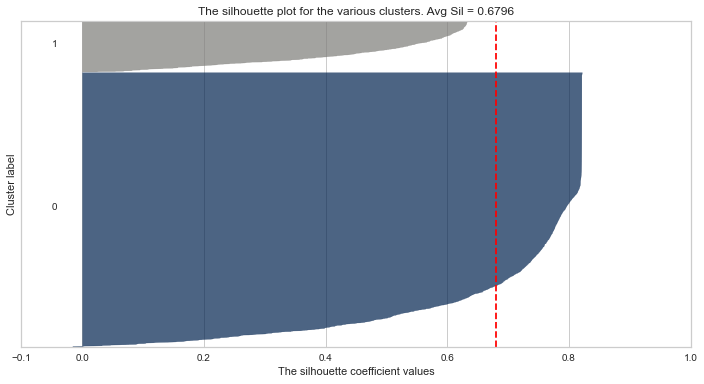

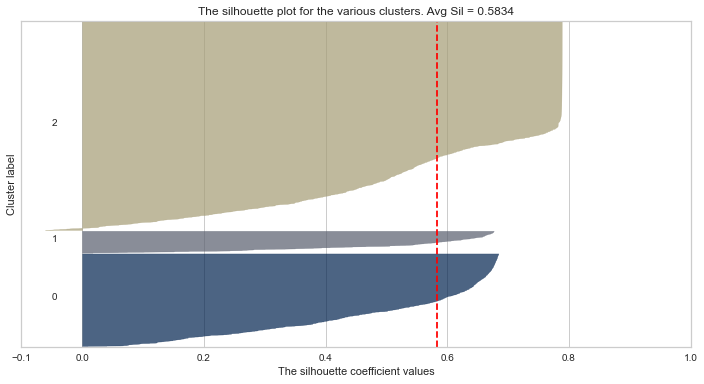

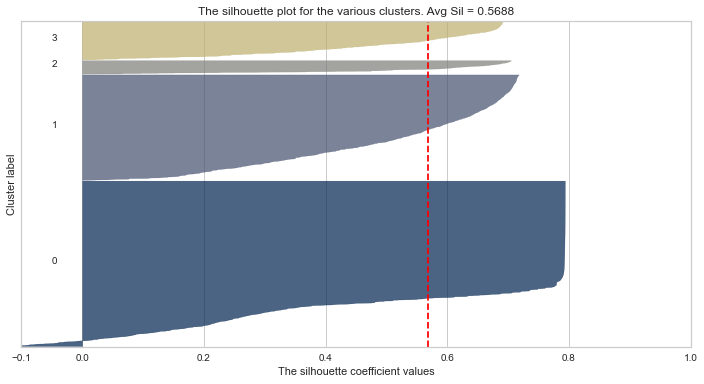

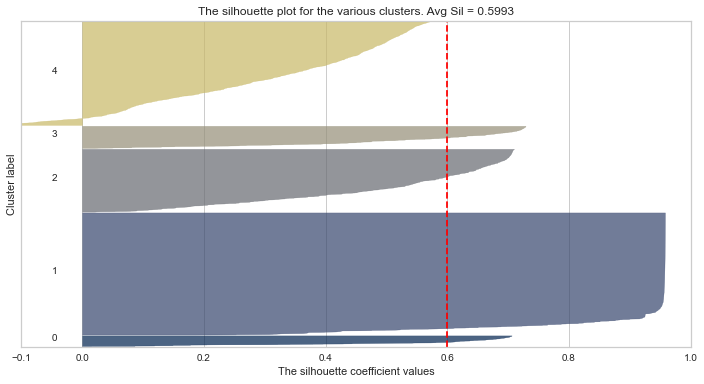

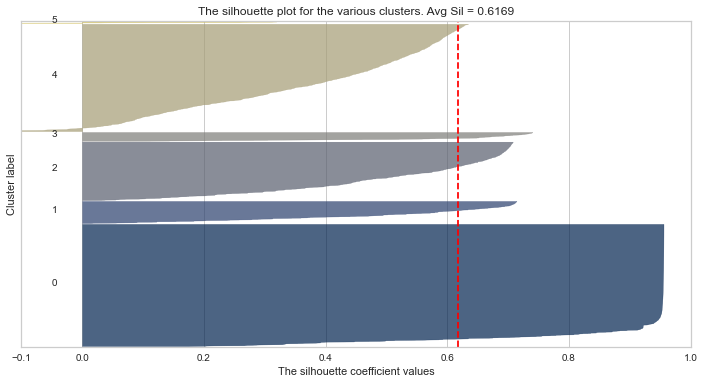

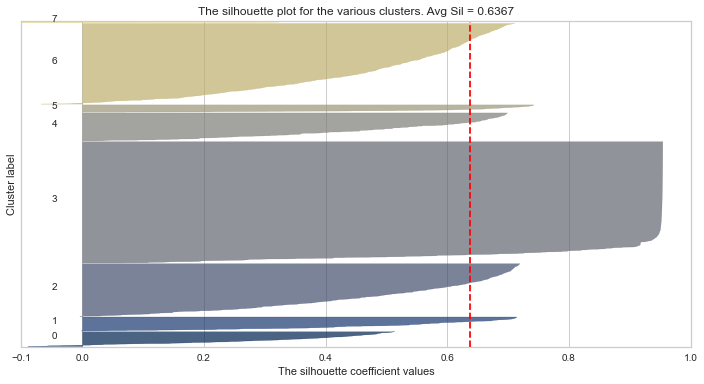

In [23]:
for i in k_list:
    if i==8:
        labels_opt=labels_k[5]
    else:
        labels_opt=labels_k[i-2]
    [labels_opt]=labels_opt
    plot_silhoulette_clusters(ndf,labels_opt,i)

In [20]:
k_opt=6

In [21]:
[norm_centers_k[k_opt-2]]=norm_centers_k[k_opt-2]

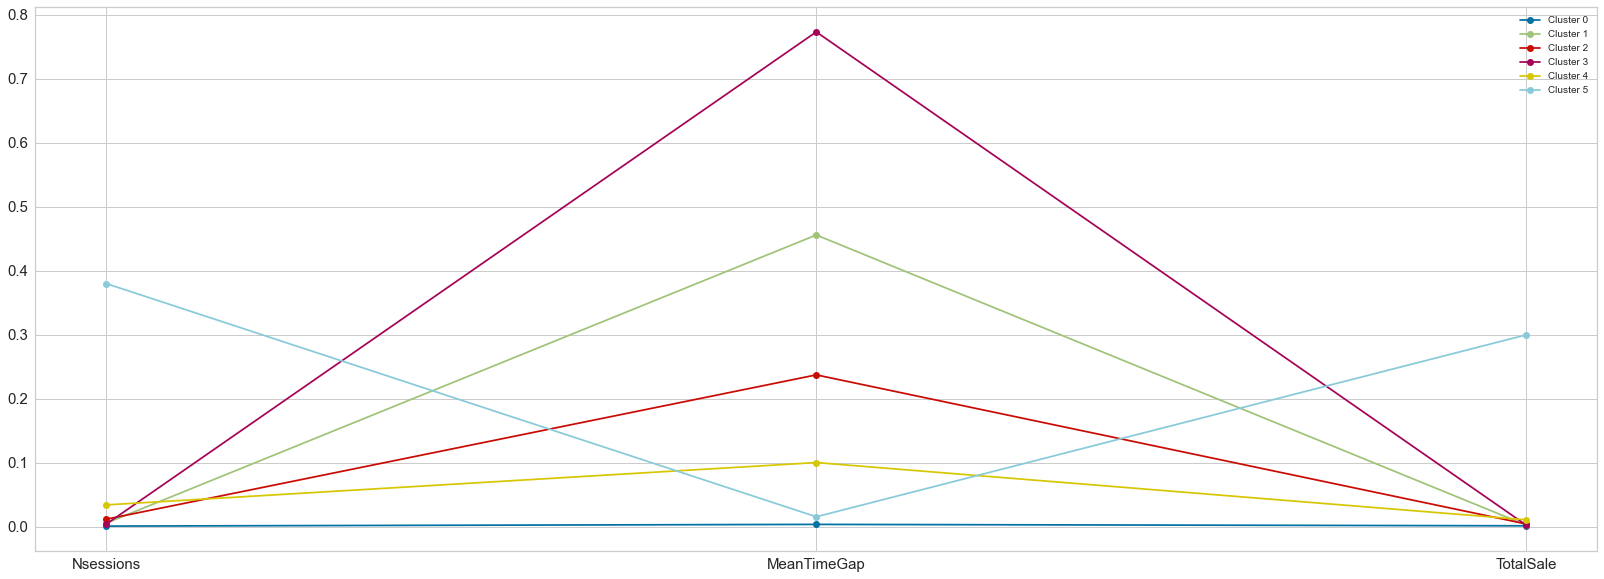

In [22]:
plot_parallelCoordinates(norm_centers_k[k_opt-2],df_aux)

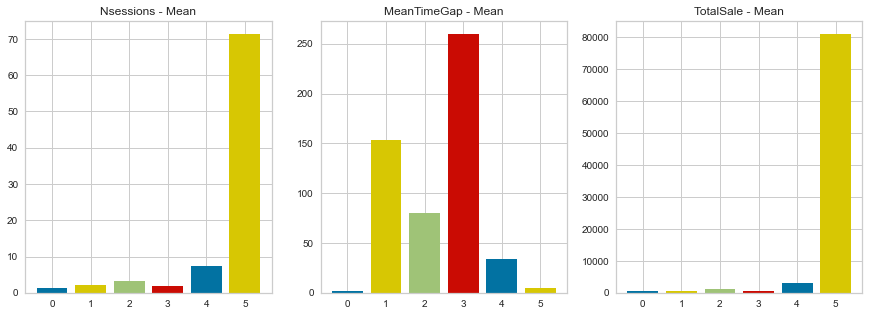

In [23]:
attr = df_aux.columns
#num_elements = 4
clusters = range(len(clust_list_11_k[k_opt-2]))
fig, axs = plt.subplots(1,3,figsize=(15,5))
for attr_index in range(len(attr)):
    mean_values = []
    for cluster_df in clust_list_11_k[k_opt-2]:
        mean_values.append(cluster_df.describe()[attr[attr_index]][1])
    axs[attr_index].bar(clusters, mean_values, color = ['b','y','g','r'])
    axs[attr_index].set_title(f"{attr[attr_index]} - Mean")

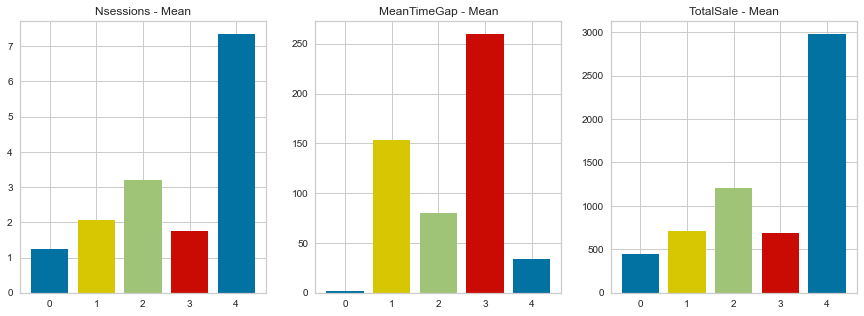

In [24]:
attr = df_aux.columns
#num_elements = 4
clusters = range(len(clust_list_11_k[k_opt-2])-1)
fig, axs = plt.subplots(1,3,figsize=(15,5))
for attr_index in range(len(attr)):
    mean_values = []
    cont=0
    for cluster_df in clust_list_11_k[k_opt-2]:
        if cont!=5:
            mean_values.append(cluster_df.describe()[attr[attr_index]][1])
            
        cont+=1
    axs[attr_index].bar(clusters, mean_values, color = ['b','y','g','r'])
    axs[attr_index].set_title(f"{attr[attr_index]} - Mean")

In [29]:
single_silhouette_score_6(ndf,labels_k,4)

0.9058617364536554
0.5060663800721139
0.5169463372141267
0.5975826322749489
0.37435450209290716
0.1022813067138082


In [27]:
clust_list_11_k[4][0].K_6='One Time'
clust_list_11_k[4][1].K_6='Rarely'
clust_list_11_k[4][2].K_6='Loyalty Medium Spent'
clust_list_11_k[4][3].K_6='Rarely'
clust_list_11_k[4][4].K_6='Loyalty High Spent'
clust_list_11_k[4][5].K_6='Wholesaler'

In [28]:
frames=[clust_list_11_k[4][0],clust_list_11_k[4][1],clust_list_11_k[4][2],clust_list_11_k[4][3],clust_list_11_k[4][4],clust_list_11_k[4][5]]
result = pd.concat(frames)
result.reset_index()

,Customer ID,MeanProdSale,TotalSale,MeanSpentSession,MeanProdSession,TotalProdRet,MinProdSpent,MaxProdSpent,MeanTimeGap,Nsessions,DistinctProd,K_6
0,16282.0,2.731818,168.30,168.300000,114.000000,0,4.95,34.00,0.000000,1.0,11,One Time
1,15266.0,6.750000,119.30,119.300000,18.000000,0,14.85,39.80,0.000000,1.0,6,One Time
2,12585.0,4.744286,628.96,209.653333,127.333333,19,6.96,138.24,8.500000,1.0,27,One Time
3,13082.0,2.968767,3595.48,359.548000,431.300000,11,8.50,864.00,10.333333,9.0,63,One Time
4,15464.0,4.210892,1048.85,1048.850000,350.000000,0,0.65,59.90,0.000000,1.0,155,One Time
...,...,...,...,...,...,...,...,...,...,...,...,...
4200,14298.0,1.496723,46172.98,1154.324500,1326.125000,322,0.19,650.25,7.230769,39.0,847,Wholesaler
4201,17450.0,3.630985,187621.89,3908.789375,1421.958333,952,6.84,7144.72,7.000000,44.0,124,Wholesaler
4202,14646.0,2.514885,269994.74,3749.926944,2636.694444,288,0.39,4992.00,4.732394,70.0,686,Wholesaler
4203,14156.0,3.833801,114322.43,1937.668305,941.440678,792,1.25,2365.20,5.982456,54.0,711,Wholesaler


In [29]:
result.to_csv(r'C:\Users\Stefano\Desktop\Data-Mining-Project\dataset\customer\Segmented_Customer_2011.csv',header=True)

<h3>OPTICS</h3>

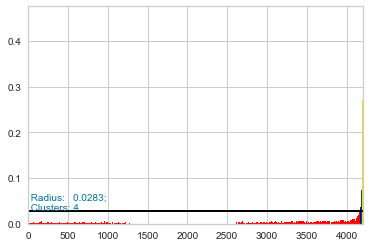

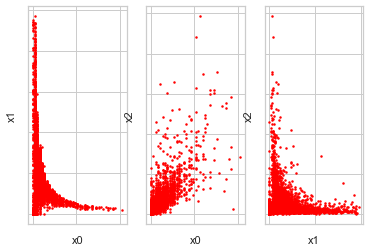

In [5]:
from pyclustering.cluster.optics import optics, ordering_analyser, ordering_visualizer
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster import cluster_visualizer_multidim
# Read sample for clustering from some file
sample = df_norm_minmax.tolist()

# Run cluster analysis where connectivity radius is bigger than real
radius = 2.0
neighbors = 3
amount_of_clusters = 4
optics_instance = optics(sample, radius, neighbors, amount_of_clusters)

# Performs cluster analysis
optics_instance.process()

# Obtain results of clustering
clusters = optics_instance.get_clusters()
noise = optics_instance.get_noise()
ordering = optics_instance.get_ordering()

# Visualize ordering diagram
analyser = ordering_analyser(ordering)
ordering_visualizer.show_ordering_diagram(analyser, amount_of_clusters)

# Visualize clustering results
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, sample)
visualizer.show()

<h2>DBSCAN</h2>

In [6]:
from scipy.spatial.distance import pdist, squareform

In [7]:
dist = pdist(X=df_norm_minmax, metric='euclidean')  # pair-wise distance: how every record is far from all others
dist = squareform(dist)                      # distance matrix given the vector dist

In [8]:
kth_distances={4:[],6:[],8:[],10:[],12:[]}
for d in dist:
    # argsort returns the indexes that would sort d
    indexes_to_sort_d = np.argsort(d)
    for k in kth_distances:
        # append to kth_distances[k] the value in d that corresponds
        # to the distance of the i-th point (record) from its k-th nn.
        # it's like: kth_distances[k].append(sorted_d[k])), but we get "sorted_d[k]" by d[indexes_to_sort_d[k]]
        kth_distances[k].append(d[indexes_to_sort_d[k]])

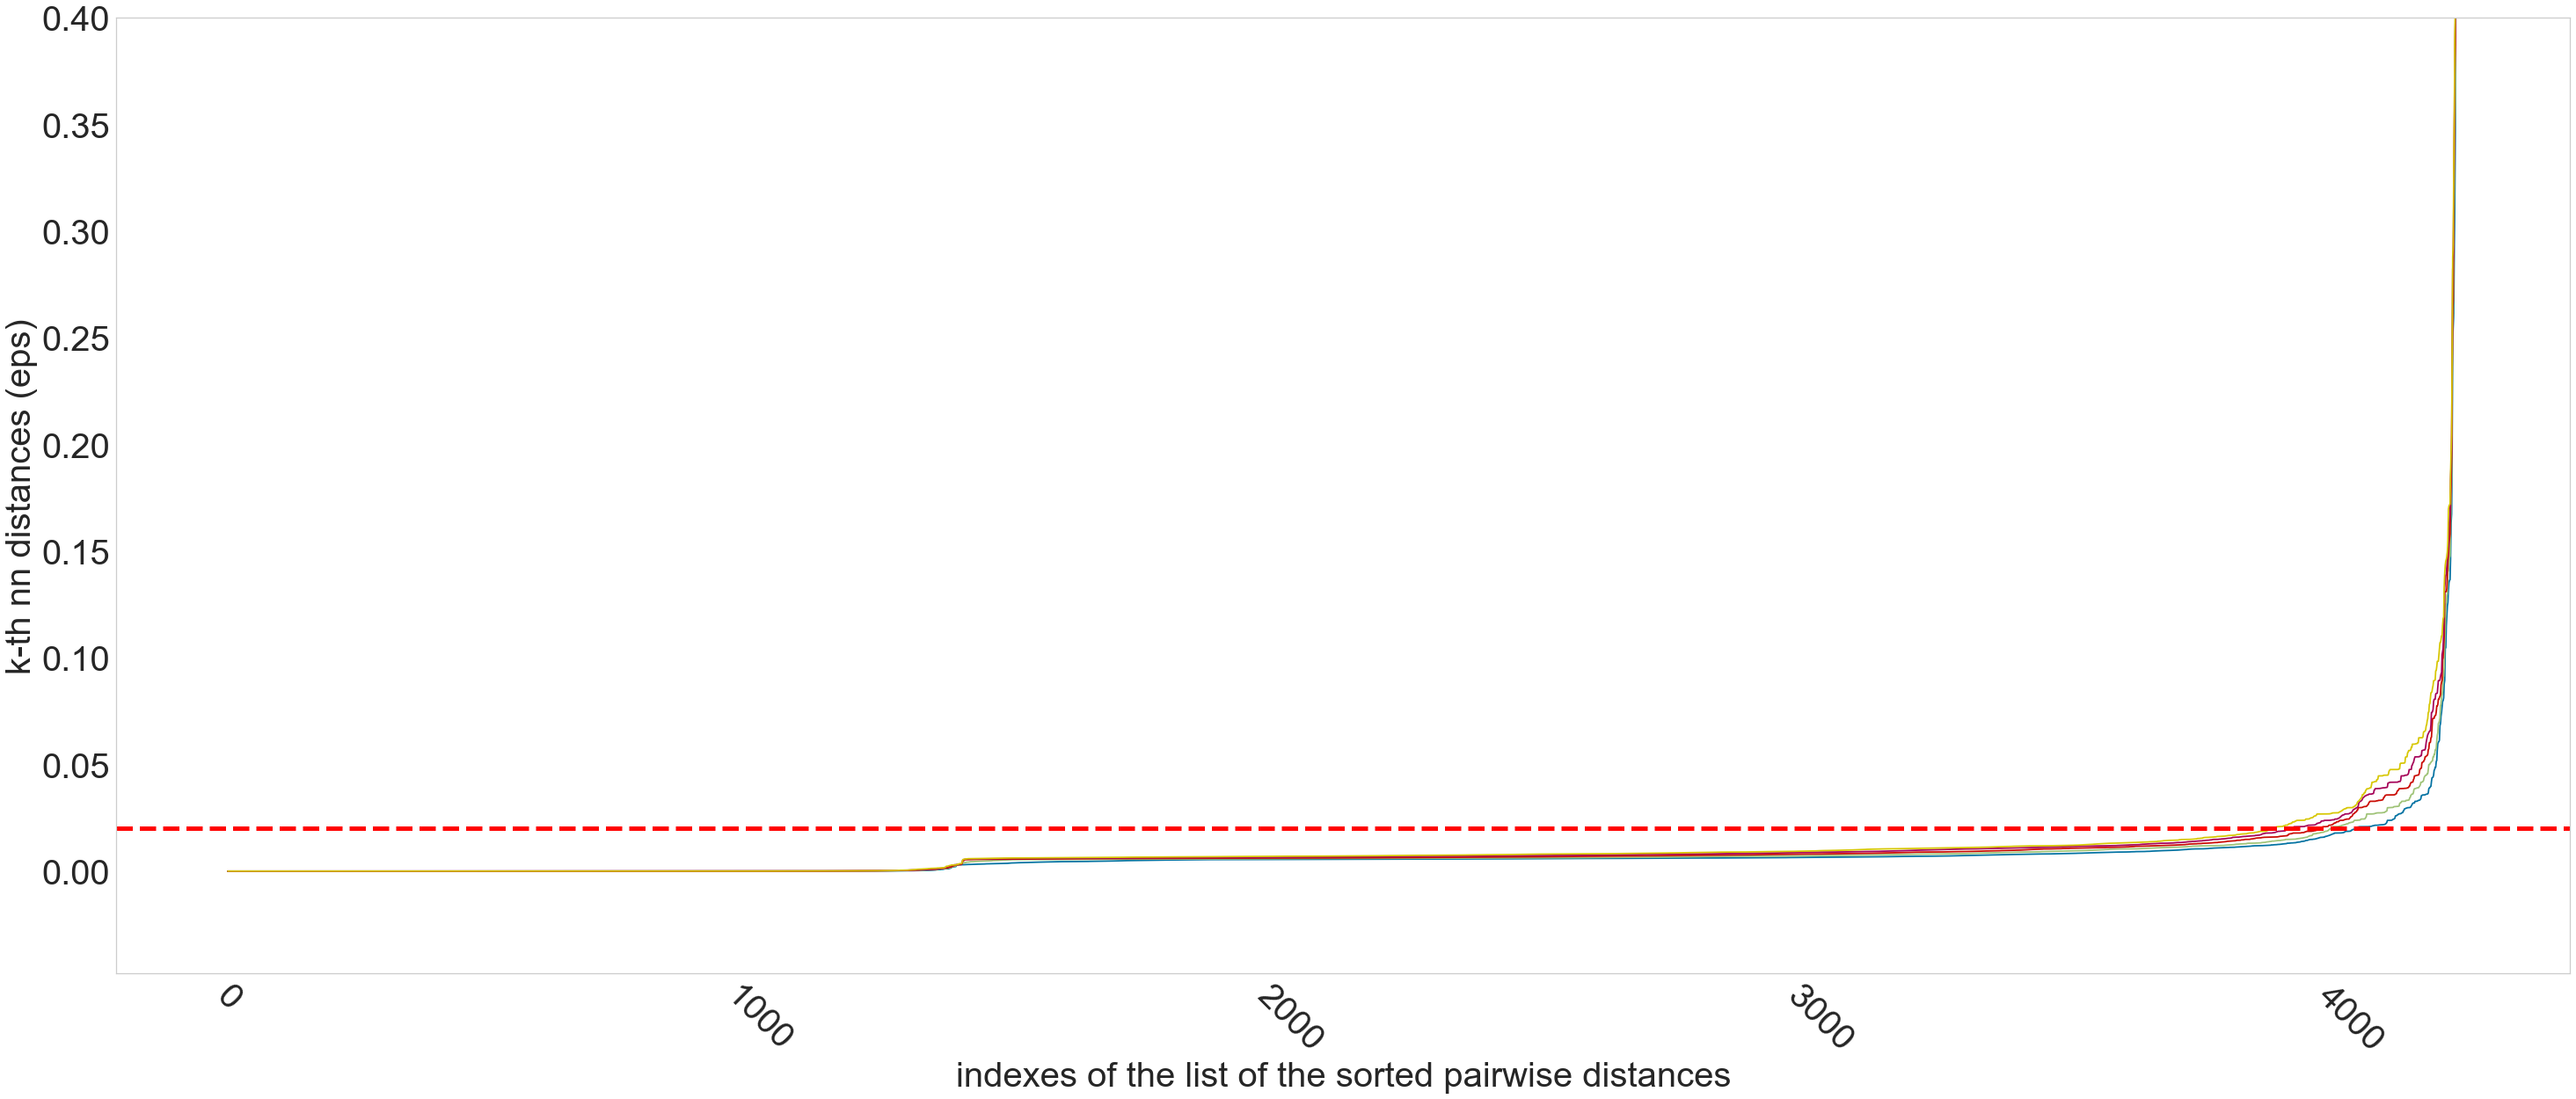

In [12]:
plt.figure(figsize=(50, 20))
for k in kth_distances.keys():
    plt.plot(range(0, len(kth_distances[k])), sorted(kth_distances[k]))
plt.ylim(top=0.4)
plt.axhline(y=0.02, color='red', linestyle='--', linewidth=5)
plt.ylabel('k-th nn distances (eps)', fontsize=40)
plt.xlabel('indexes of the list of the sorted pairwise distances', fontsize=40)
plt.xticks(rotation=-45, fontsize=40)
plt.yticks(fontsize=40)
plt.tick_params(axis='both', which='major')
plt.grid()
plt.show()

In [10]:
kth_distances={15:[],20:[],25:[],30:[],35:[]}
for d in dist:
    # argsort returns the indexes that would sort d
    indexes_to_sort_d = np.argsort(d)
    for k in kth_distances:
        # append to kth_distances[k] the value in d that corresponds
        # to the distance of the i-th point (record) from its k-th nn.
        # it's like: kth_distances[k].append(sorted_d[k])), but we get "sorted_d[k]" by d[indexes_to_sort_d[k]]
        kth_distances[k].append(d[indexes_to_sort_d[k]])

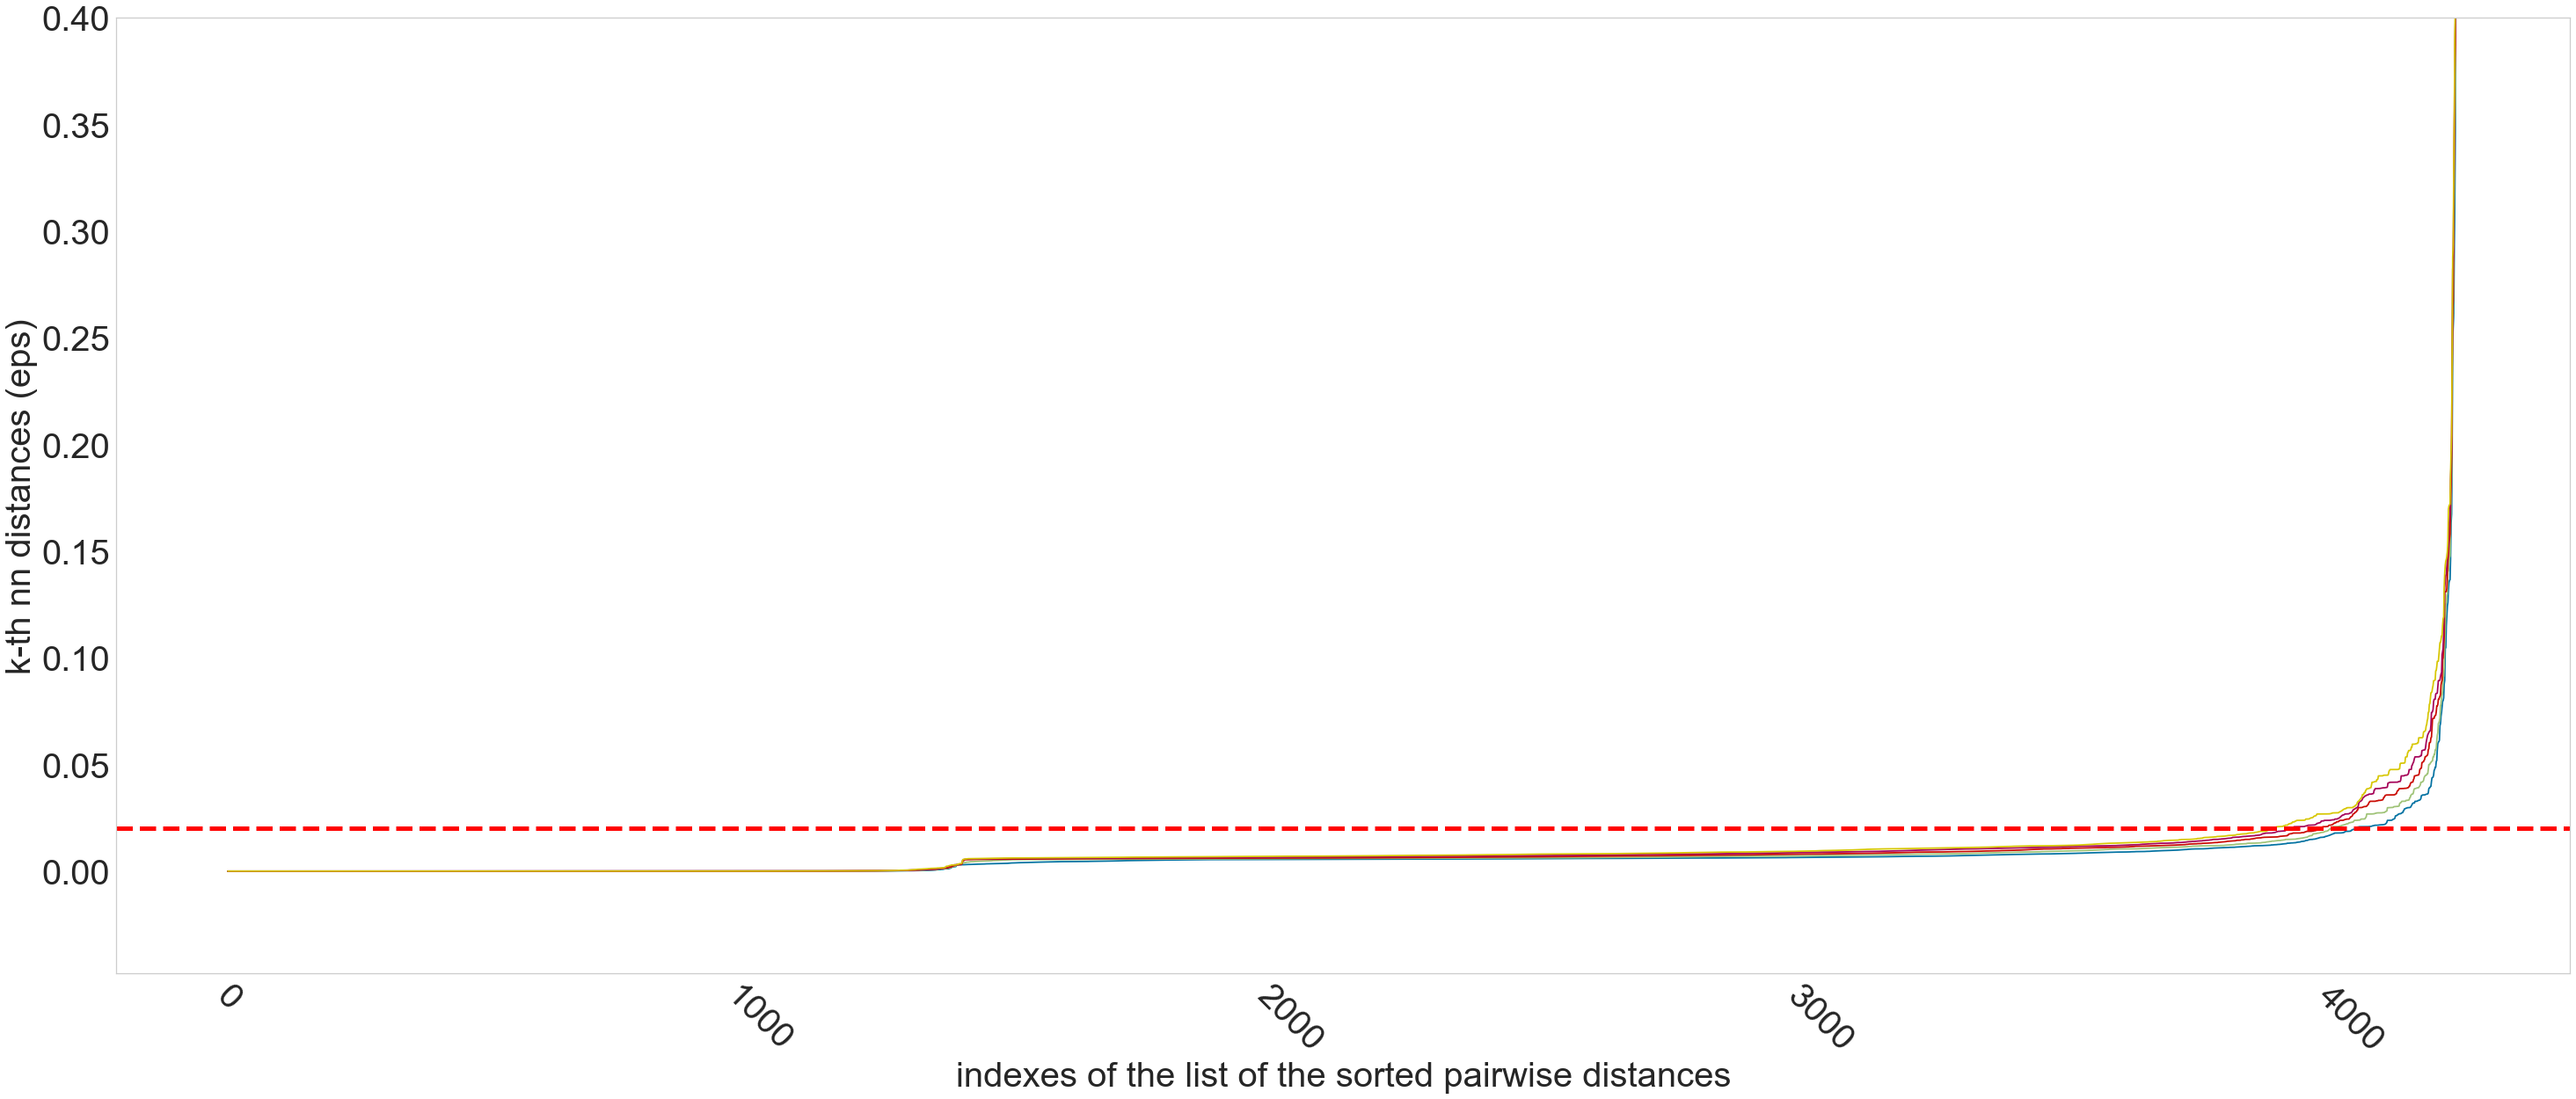

In [13]:
plt.figure(figsize=(50, 20))
for k in kth_distances.keys():
    plt.plot(range(0, len(kth_distances[k])), sorted(kth_distances[k]))
plt.ylim(top=0.4)
plt.axhline(y=0.02, color='red', linestyle='--', linewidth=5)
plt.ylabel('k-th nn distances (eps)', fontsize=40)
plt.xlabel('indexes of the list of the sorted pairwise distances', fontsize=40)
plt.xticks(rotation=-45, fontsize=40)
plt.yticks(fontsize=40)
plt.tick_params(axis='both', which='major')
plt.grid()
plt.show()

In [19]:
eps_to_test =[0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019]
min_samples_to_test=[3, 4, 5, 6, 7, 8, 9,10,12,14]

print("EPS:", eps_to_test)
print("MIN_SAMPLES:", list(min_samples_to_test))

EPS: [0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019]
MIN_SAMPLES: [3, 4, 5, 6, 7, 8, 9, 10, 12, 14]


In [20]:
#Verrà eseguita prima la clusterizzazione e poi il calcolo delle metriche:
#Distanza media tra i noise points e i 6 punti più vicini (6-NN)
#Numero di cluster che vengono individuati 

def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting ======================================================================
    
    dbscan_model_ = DBSCAN( eps = eps, min_samples = min_samples)
    dbscan_model_.fit(dataset)
    
    # Mean Noise Point Distance metric =============================================
    noise_indices = dbscan_model_.labels_ == -1
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric ==============================================
    
    number_of_clusters = len(set(dbscan_model_.labels_[dbscan_model_.labels_ >= 0]))
    score=silhouette_score(dataset,dbscan_model_.labels_)
    
    # Log ==========================================================================
    
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s" % (iter_, eps, min_samples, str(noise_mean_distance), number_of_clusters))
        
    return(noise_mean_distance, number_of_clusters, score)

In [21]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sulla silhoette
results_score = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

In [22]:
#grid search
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric, score = get_metrics(eps, min_samples, ndf, iter_)
        print(score)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric
        results_score.loc[eps, min_samples]=score

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 0.012 and min_samples =   3 | 0.078    6
-0.30100197356401315
  2 | Tested with eps = 0.012 and min_samples =   4 | 0.076    6
-0.2993375221977696
  3 | Tested with eps = 0.012 and min_samples =   5 | 0.063    3
0.13199309881723603
  4 | Tested with eps = 0.012 and min_samples =   6 | 0.056    2
0.47578898806471737
  5 | Tested with eps = 0.012 and min_samples =   7 | 0.054    3
0.463422870420211
  6 | Tested with eps = 0.012 and min_samples =   8 | 0.052    5
0.47240906612591277
  7 | Tested with eps = 0.012 and min_samples =   9 |  0.05    7
0.4806119262487866
  8 | Tested with eps = 0.012 and min_samples =  10 | 0.045    6
0.5059704674554425
  9 | Tested with eps = 0.012 and min_samples =  12 | 0.035    5
0.5543981362648933
 10 | Tested with eps = 0.012 and min_samples =  14 |  0.03    3
0.5550472721966953
 11 | Tested with eps =

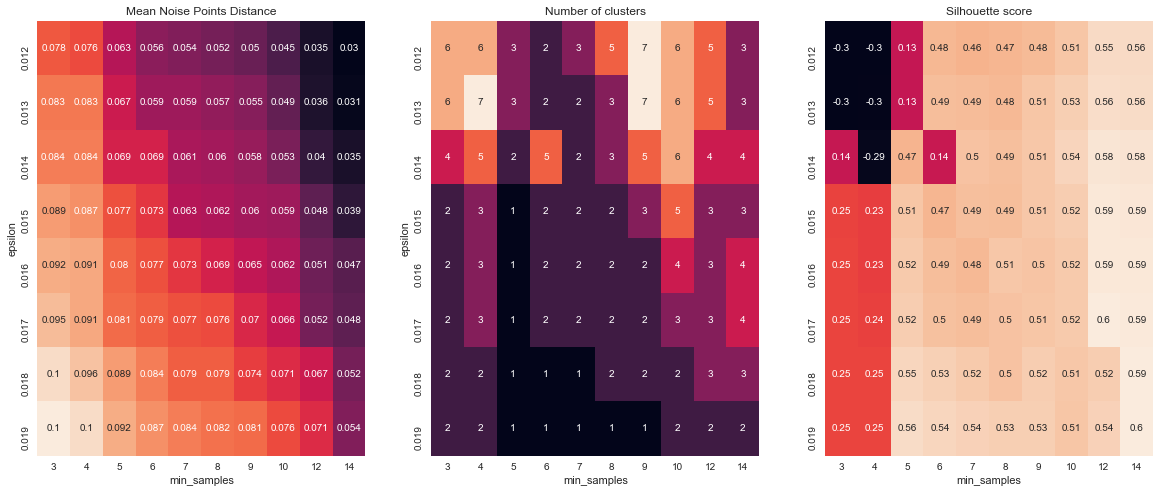

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("Number of clusters")
sns.heatmap(results_score, annot=True, ax=ax3, cbar=False).set_title("Silhouette score")
ax1.set_xlabel("min_samples")
ax2.set_xlabel("min_samples")
ax3.set_xlabel("min_samples")
ax1.set_ylabel("epsilon")
ax2.set_ylabel("epsilon")
ax2.set_ylabel("epsilon")
plt.show()

In [36]:
dbscan_model = DBSCAN( eps = 0.016, min_samples = 14)
dbscan_model.fit(ndf)

DBSCAN(eps=0.016, min_samples=14)

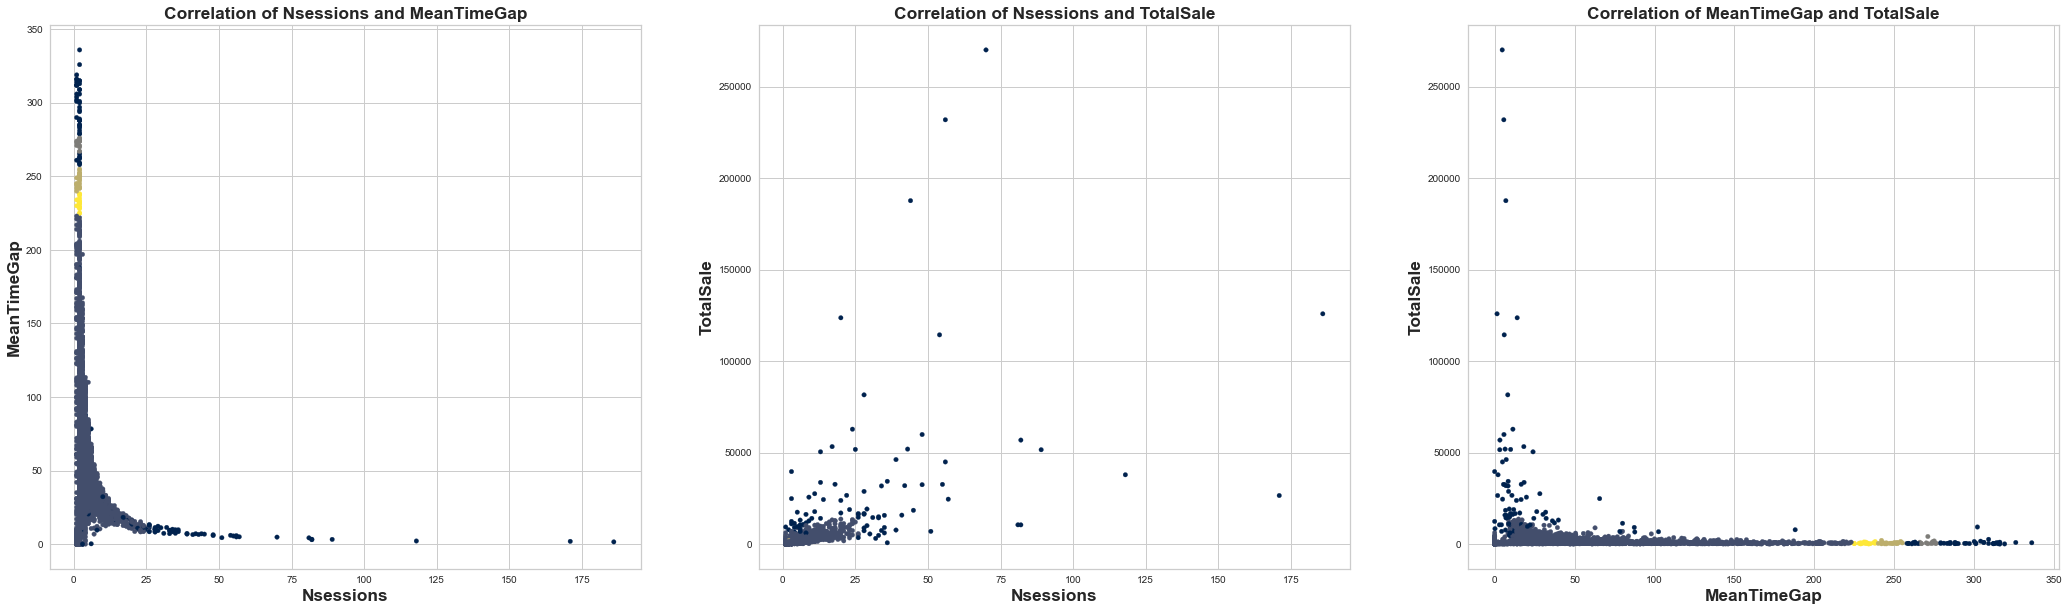

In [45]:
f, axs = plt.subplots(nrows=1, ncols=3, figsize=(36,10))
index = 0
for i in range(0,len(df_aux.columns)):
    for j in range(i+1,len(df_aux.columns)):
        axs[index].scatter(df_aux[df_aux.columns[i]], df_aux[df_aux.columns[j]], c=dbscan_model.labels_, s=20, cmap=cm.cividis)
        axs[index].set_title('Correlation of ' + df_aux.columns[i] + ' and ' + df_aux.columns[j], fontdict={'fontsize': 'xx-large', 'fontweight' : 'bold'})
        axs[index].set_xlabel(df_aux.columns[i], fontdict={'fontsize': 'xx-large', 'fontweight' : 'bold'})
        axs[index].set_ylabel(df_aux.columns[j], fontdict={'fontsize': 'xx-large', 'fontweight' : 'bold'})
        index = index + 1

In [48]:
df_aux['LABEL']=dbscan_model.labels_

<ipython-input-48-0a6dfb3bde5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['LABEL']=dbscan_model.labels_


In [49]:
clust_list_dbscan = list()
for i in range(len(df_aux['LABEL'].unique())):
    clust_list_dbscan.append(df_aux[df_aux['LABEL'] == i])

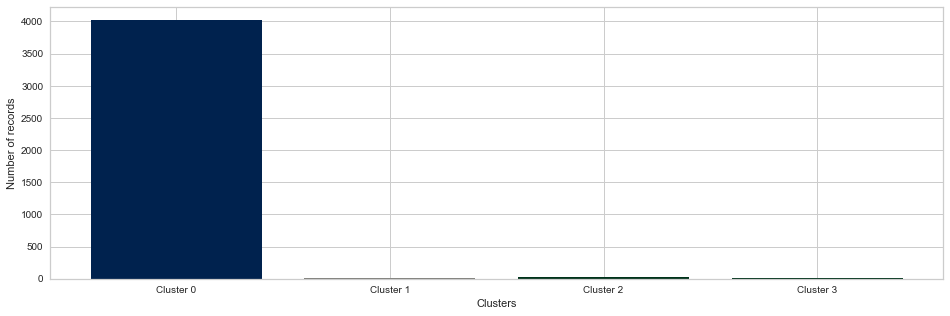

4024
14
21
17


In [50]:
#0.5 5
plt.figure(figsize=(16, 5))
#f, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
plt.bar(['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], [len(clust_list_dbscan[0]),len(clust_list_dbscan[1]),len(clust_list_dbscan[2]),len(clust_list_dbscan[3])], color=['#00224e','#7d7c78','#00321a','#00321a'])
plt.xlabel('Clusters')
plt.ylabel('Number of records')
plt.show()

print(len(clust_list_dbscan[0]))
print(len(clust_list_dbscan[1]))
print(len(clust_list_dbscan[2]))
print(len(clust_list_dbscan[3]))

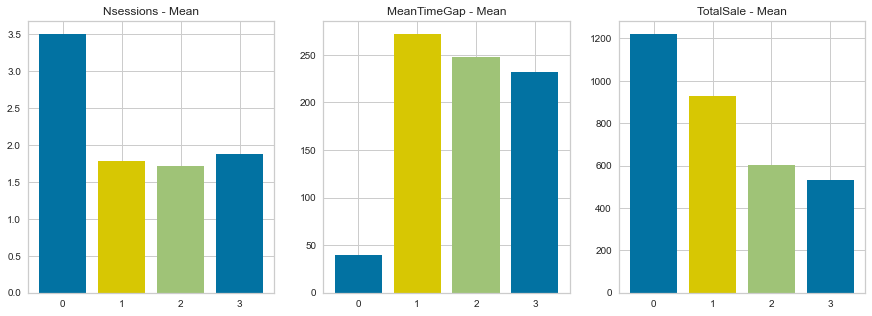

In [41]:
attr = df_aux.columns
#num_elements = 4
clusters = range(len(clust_list_dbscan))
fig, axs = plt.subplots(1,3,figsize=(15,5))
for attr_index in range(len(attr)-1):
    mean_values = []
    for cluster_df in clust_list_dbscan:
        mean_values.append(cluster_df.describe()[attr[attr_index]][1])
    axs[attr_index].bar(clusters, mean_values, color = ['b','y','g'])
    axs[attr_index].set_title(f"{attr[attr_index]} - Mean")

<h2>Hierchical clustering</h2>

In [21]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [22]:
# from the hierarchical clustering defined by the given linkage matrix and threshold return the cluster topology
def count_cluster_elements(data, threshold, criterion='distance'):
    count = {}
    clusters = fcluster(data, threshold, criterion)
    for c in clusters:
        count[c] = count[c]+1 if c in count else 1
    return count, clusters

# from flat clusters returns dictionary of dataframes representing the cluster
def get_dataframe(complete_df, flat_cluster):
    distinct_clusters = list(set(flat_cluster))
    sorted(distinct_clusters)
    cluster_index = {c:[] for c in distinct_clusters} 
    for i in range(len(flat_cluster)):
        cluster_index[flat_cluster[i]].append(i)
    clusters_df = {}
    indexes = df.index
    for c in distinct_clusters:
        elem = cluster_index[c]
        clusters_df[c] = df[df.index.isin([indexes[i] for i in elem])]
    return clusters_df

# plot values of elements in clusters
def plot_cluster_values(cdf, df_aux):
    attr = df_aux.columns
    clusters = [i for i in cdf]
    fig, axs = plt.subplots(1,len(attr),figsize=(20,5))
    for attr_index in range(len(attr)):
        mean_values = []
        max_values = []
        min_values = []
        for _, cluster_df in cdf.items():
            mean_values.append(cluster_df.describe()[attr[attr_index]][1])
            max_values.append(cluster_df.describe()[attr[attr_index]][7])
            min_values.append(cluster_df.describe()[attr[attr_index]][3])
        axs[attr_index].bar(clusters, mean_values, color = ['b','g','r','y'])
        axs[attr_index].set_title(f"{attr[attr_index]} - Mean")

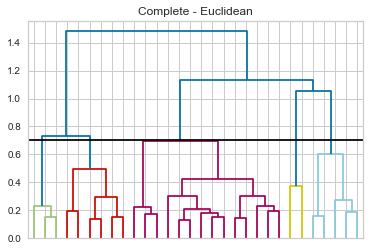

In [46]:
data_dist = pdist(ndf, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
threshold_value = 0.7
res = dendrogram(data_link, color_threshold=threshold_value, truncate_mode='lastp')
plt.tick_params(labelbottom=False)
plt.title("Complete - Euclidean")
plt.axhline(y=threshold_value, color="black")

In [47]:
count, clusters = count_cluster_elements(data_link, threshold_value)
score = silhouette_score(ndf, clusters)
print("Clusters:", len(count.keys()), end=" - ")
print(list(reversed(sorted(count.values()))))
print(f"Silhouette score: {score}")

Clusters: 5 - [3553, 587, 58, 5, 2]
Silhouette score: 0.652023540921318


[1:58] [2:587] [3:3553] [4:2] [5:5] 

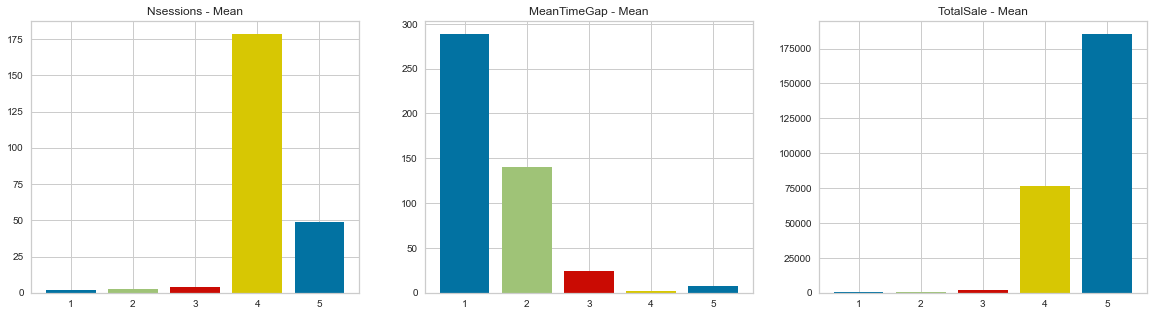

In [48]:
cdf = get_dataframe(df, clusters)
for cluster, cluster_df in cdf.items():
    print(f"[{cluster}:{len(cluster_df)}]", end=" ")
plot_cluster_values(cdf, df_aux)

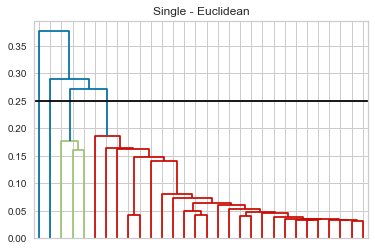

In [49]:
data_dist = pdist(ndf, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
threshold_value = 0.25
res = dendrogram(data_link, color_threshold=threshold_value, truncate_mode='lastp')
plt.tick_params(labelbottom=False)
plt.title("Single - Euclidean")
plt.axhline(y=threshold_value, color="black")

In [50]:
count, clusters = count_cluster_elements(data_link, threshold_value)
score = silhouette_score(ndf, clusters)
print("Clusters:", len(count.keys()), end=" - ")
print(list(reversed(sorted(count.values()))))
print(f"Silhouette score: {score}")

Clusters: 4 - [4200, 3, 1, 1]
Silhouette score: 0.8126835367641694


[1:3] [2:4200] [3:1] [4:1] 

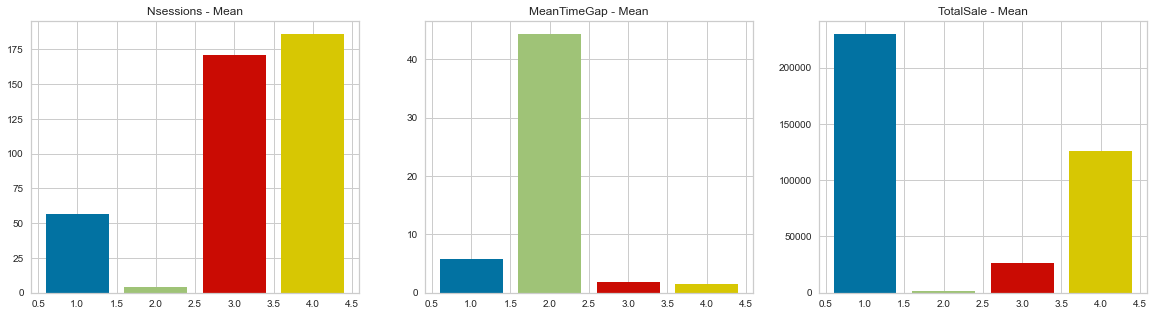

In [51]:
cdf = get_dataframe(df, clusters)
for cluster, cluster_df in cdf.items():
    print(f"[{cluster}:{len(cluster_df)}]", end=" ")
plot_cluster_values(cdf, df_aux)

In [52]:
del data_dist, data_link, threshold_value, res, count, clusters, score, cdf


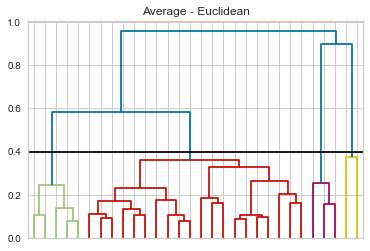

In [59]:
data_dist = pdist(ndf, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
threshold_value = 0.4
res = dendrogram(data_link, color_threshold=threshold_value, truncate_mode='lastp')
plt.tick_params(labelbottom=False)
plt.title("Average - Euclidean")
plt.axhline(y=threshold_value, color="black")

In [60]:
count, clusters = count_cluster_elements(data_link, threshold_value)
score = silhouette_score(ndf, clusters)
print("Clusters:", len(count.keys()), end=" - ")
print(list(reversed(sorted(count.values()))))
print(f"Silhouette score: {score}")

Clusters: 4 - [4001, 199, 3, 2]
Silhouette score: 0.7325945729738743


[1:199] [2:4001] [3:3] [4:2] 

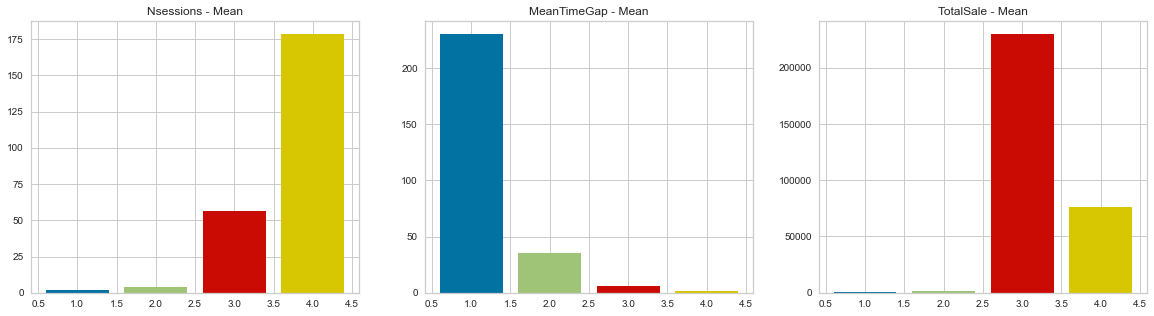

In [61]:
cdf = get_dataframe(df, clusters)
for cluster, cluster_df in cdf.items():
    print(f"[{cluster}:{len(cluster_df)}]", end=" ")
plot_cluster_values(cdf, df_aux)

In [62]:
del data_dist, data_link, threshold_value, res, count, clusters, score, cdf


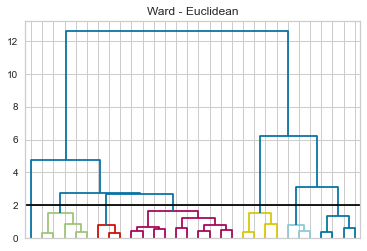

In [38]:
data_dist = pdist(ndf, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
threshold_value = 2.0
res = dendrogram(data_link, color_threshold=threshold_value, truncate_mode='lastp')
plt.tick_params(labelbottom=False)
plt.title("Ward - Euclidean")
plt.axhline(y=threshold_value, color="black")

In [39]:
count, clusters = count_cluster_elements(data_link, threshold_value)
score = silhouette_score(ndf, clusters)
print("Clusters:", len(count.keys()), end=" - ")
print(list(reversed(sorted(count.values()))))
print(f"Silhouette score: {score}")

Clusters: 7 - [1500, 1174, 671, 561, 207, 82, 10]
Silhouette score: 0.5815028354338809


[1:1500] [2:10] [3:671] [4:1174] [5:561] [6:82] [7:207] 

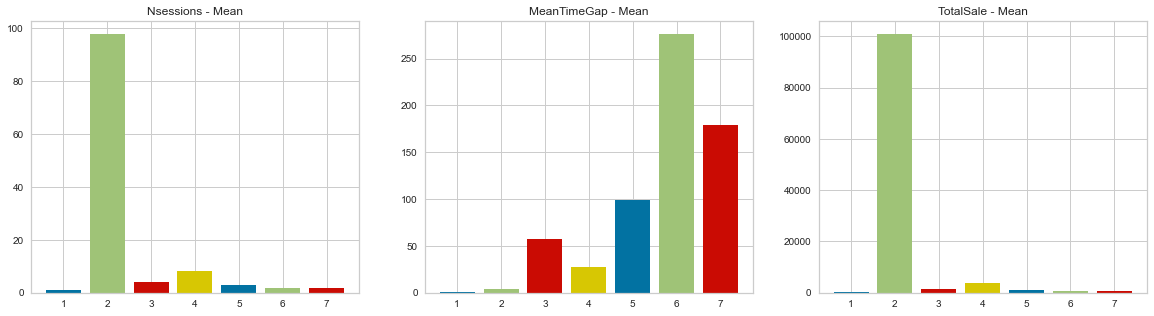

In [41]:
cdf = get_dataframe(df, clusters)
for cluster, cluster_df in cdf.items():
    print(f"[{cluster}:{len(cluster_df)}]", end=" ")
plot_cluster_values(cdf, df_aux)

[3:671] [4:1174] [5:561] [6:82] [7:207] 

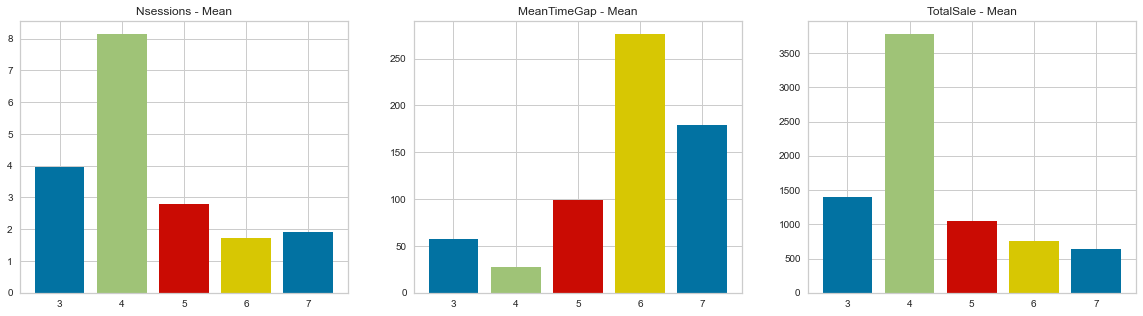

In [27]:
cdf = get_dataframe(df, clusters)
cdf = dict(list(cdf.items())[2:])
for cluster, cluster_df in cdf.items():
    print(f"[{cluster}:{len(cluster_df)}]", end=" ")
plot_cluster_values(cdf, df_aux)

In [62]:
del data_dist, data_link, threshold_value, res, count, clusters, score, cdf

<h2>Agglomerative Clustering</h2>

In [22]:
def agg_clust(data, method):
    print(f"### {method} - euclidean ###", end="\n\n")
    for i in range(3, 8):
        complete = AgglomerativeClustering(n_clusters=i, linkage=method, affinity='euclidean', connectivity=None)
        complete.fit(data)
        hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
        print('Numero Cluster: ', i)
        print('Cluster', dict(zip(bins, hist)))
        print('Silhouette Score', silhouette_score(data, complete.labels_))
    return complete

In [64]:
agg_clust(ndf, "complete")
agg_clust(ndf, "single")
agg_clust(ndf, "average")
agg_clust(ndf, "ward")

### complete - euclidean ###

Numero Cluster:  3
Cluster {0: 7, 1: 645, 2: 3553}
Silhouette Score 0.6829280747152068
Numero Cluster:  4
Cluster {0: 645, 1: 5, 2: 3553, 3: 2}
Silhouette Score 0.6831725290458377

### single - euclidean ###

Numero Cluster:  3
Cluster {0: 4203, 1: 1, 2: 1}
Silhouette Score 0.8153393157305782
Numero Cluster:  4
Cluster {0: 4200, 1: 3, 2: 1, 3: 1}
Silhouette Score 0.8126835367641694

### average - euclidean ###

Numero Cluster:  3
Cluster {0: 4200, 1: 2, 2: 3}
Silhouette Score 0.8135408157056402
Numero Cluster:  4
Cluster {0: 2, 1: 4001, 2: 3, 3: 199}
Silhouette Score 0.7325945729738743

### ward - euclidean ###

Numero Cluster:  3
Cluster {0: 3355, 1: 289, 2: 561}
Silhouette Score 0.5633032701845537
Numero Cluster:  4
Cluster {0: 289, 1: 1855, 2: 561, 3: 1500}
Silhouette Score 0.5572745318940604



In [23]:
a=agg_clust(ndf, "ward")

### ward - euclidean ###

Numero Cluster:  3
Cluster {0: 3355, 1: 289, 2: 561}
Silhouette Score 0.5633032701845537
Numero Cluster:  4
Cluster {0: 289, 1: 1855, 2: 561, 3: 1500}
Silhouette Score 0.5572745318940604
Numero Cluster:  5
Cluster {0: 1855, 1: 207, 2: 561, 3: 1500, 4: 82}
Silhouette Score 0.5617663650669743
Numero Cluster:  6
Cluster {0: 1845, 1: 207, 2: 561, 3: 1500, 4: 82, 5: 10}
Silhouette Score 0.5744375515090682
Numero Cluster:  7
Cluster {0: 1174, 1: 207, 2: 561, 3: 1500, 4: 82, 5: 10, 6: 671}
Silhouette Score 0.5815028354338809


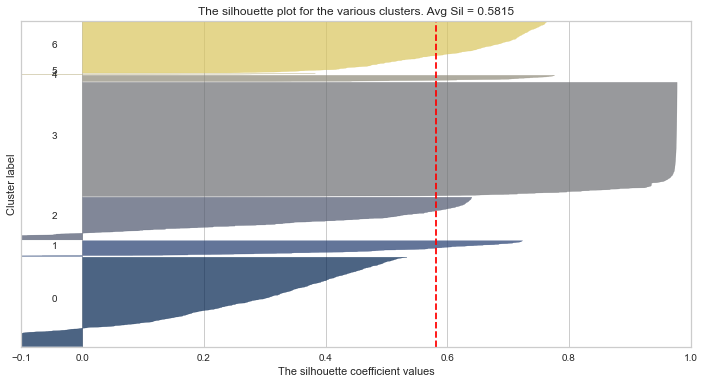

In [25]:
plot_silhoulette_clusters(ndf,a.labels_,7)